# Lack of Robustness of the Markowitz Procedure, and the GMV

Max sharpe ratio portfolio not good in practice
The GMV (Global Minimum Variance) portfolio is used in practice - it is the only place on the efficient frontier that doesn't have an expected return and attempts to minimize variance between assets.

## ChatGPT
> The Global Minimum Variance (GMV) portfolio is a concept in finance that represents a portfolio of assets designed to achieve the lowest possible level of risk or volatility while still delivering a positive expected return. It is a key component of Modern Portfolio Theory (MPT), which was developed by Harry Markowitz in 1952.
>
> The GMV portfolio is constructed by optimizing the allocation of assets in a way that minimizes the portfolio's overall variance or standard deviation. This is typically done by considering the historical or expected returns and correlations of the assets in the portfolio. By finding the allocation that minimizes risk, investors aim to create a portfolio that provides stable returns and is well-diversified.
>
> Source: Markowitz, H. (1952). Portfolio Selection. The Journal of Finance, 7(1), 77-91.
>
> Today, the GMV portfolio is still used in finance as a foundational concept in portfolio management. It serves as a benchmark for constructing portfolios with a risk-averse approach, especially in situations where investors prioritize risk reduction over potential high returns. However, it's worth noting that the practical implementation of the GMV portfolio can be challenging due to the estimation of expected returns and asset correlations, which can vary over time.
>
> Investors and portfolio managers often use more advanced techniques and data analysis methods to construct portfolios that balance risk and return, taking into account factors such as market conditions and economic outlook. Nevertheless, the GMV portfolio remains a fundamental theoretical concept that helps investors understand the trade-off between risk and return in their investment decisions.

In [23]:
%load_ext autoreload
%autoreload 2 
from sys import path 
path.append('../')

import numpy as np 
import pandas as pd 
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
l = ['Food', 'Steel']
erk.msr(riskfree_rate=.1, er=er[l], cov=cov.loc[l,l])

array([0.75040362, 0.24959638])

In [14]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

Here we try making a guess about the expected returns (using np.array())
Then we run the same max sharpe ratio function to see how the portfolio optimal weights are drastically different even though the estimates were close

Error maximizing nature of Markowitz

In [15]:
erk.msr(0.1, np.array([.11, .12]),cov.loc[l,l])

array([0.57930354, 0.42069646])

In [16]:
erk.msr(0.1, np.array([.10, .13]),cov.loc[l,l])

array([0., 1.])

In [17]:
erk.msr(0.1, np.array([.13, .10]),cov.loc[l,l])

array([1., 0.])

<Axes: xlabel='Volatility'>

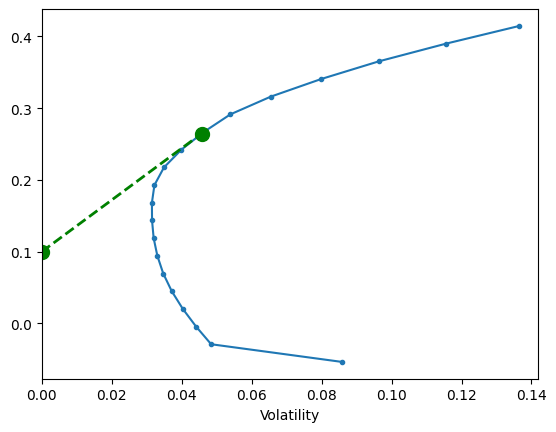

In [18]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)


<Axes: xlabel='Volatility'>

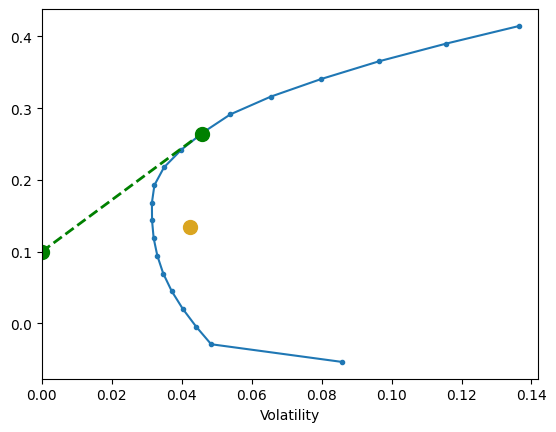

In [19]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)


To calculate the Global Minimum Variance portfolio, you can use 0% risk-free rate
When calculating the maximum sharpe ratio, the optimizer has to give the least volatility in order to give the maximum sharpe ratio 

You give 0% risk-free rate <br>
all 1's for the exepected returns (`np.repeat(1, n)`)

<Axes: xlabel='Volatility'>

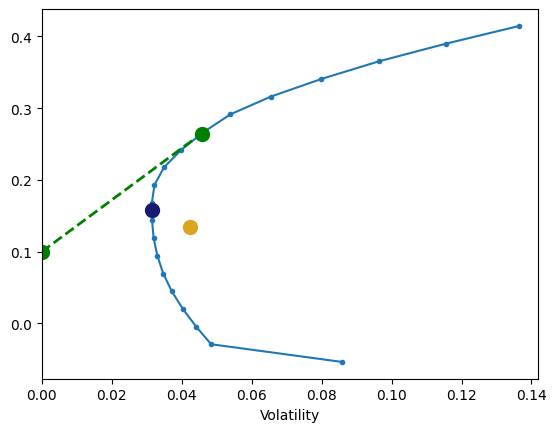

In [20]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)